#The McCulloch-Pitts Artificial Neuron
The first computational model of a neuron was proposed by Warren MuCulloch (neuroscientist) and Walter Pitts (logician) in 1943.

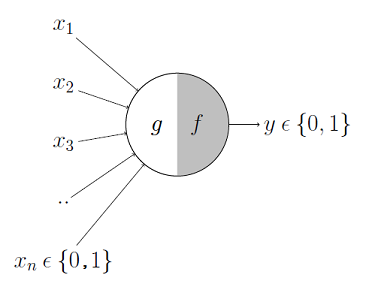

There are two different parts:
*   inputs --> we aggregate i.e. take a sum of all the inputs.
*   Determinte the Thresholds based on our Tasks.

# Implement some boolean function with our MCP Neurons.
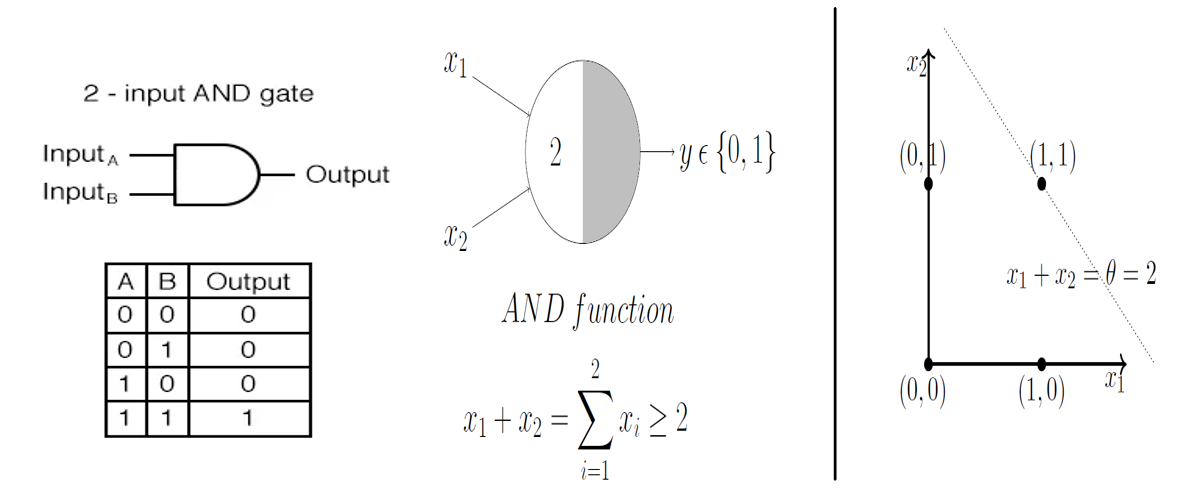

In [1]:
# Two inputs A and  B
import numpy as np
A = [0,0,1,1]
B = [0,1,0,1]
# Aggreate of my inputs
G = [i + j for i, j in zip(A, B )]
print(f"Agrregate of my input:\n", G)

Agrregate of my input:
 [0, 1, 1, 2]


##What is my Threshold values:.......

In [2]:
def boolean_gates(I, Threshold):
  """
  parameters:
  I: aggreagated inputs
  Threshold: Threshold values for AND operations
  Returns:
  the binary threshold output
  """
  if I >= Threshold:
    return 1
  else:
    return 0
    

      

In [3]:
for i in G:
  activation = boolean_gates(i, 2)
  print(f'Activation: {activation}')

Activation: 0
Activation: 0
Activation: 0
Activation: 1


# Implement for OR Gate:
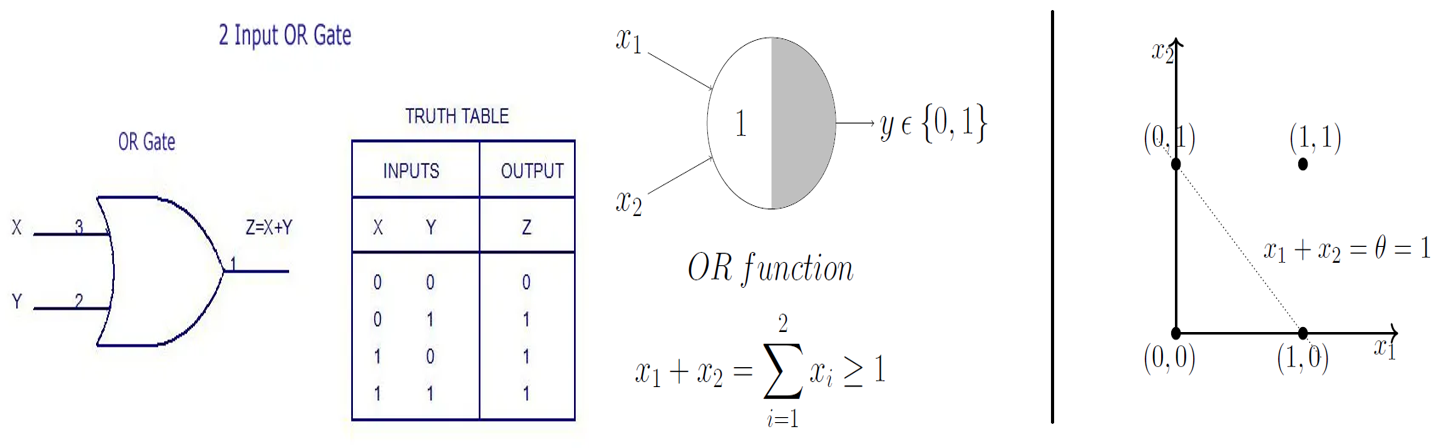

In [4]:
# What will be the value of my Threshold:
for i in G:
  activation = boolean_gates(i, 1)
  print(f'Activation: {activation}')


Activation: 0
Activation: 1
Activation: 1
Activation: 1


In [5]:
import numpy as np

In [6]:
# matrix of inputs
input_table = np.array([
    [0,0], # both no
    [0,1], # one no, one yes
    [1,0], # one yes, one no
    [1,1]  # bot yes
])

print(f'input table:\n{input_table}')

input table:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [7]:
x1 = [0,0,1,1]
x2 = [0,1,0,1]
o = [i + j for i, j in zip(x1, x2)]
o

[0, 1, 1, 2]

In [8]:
# array of weights
weights = np.array([1,1])
print(f'weights: {weights}')

weights: [1 1]


In [9]:
# dot product matrix of inputs and weights
dot_products = input_table @ weights
print(f'Dot products: {dot_products}')

Dot products: [0 1 1 2]


In [10]:
def linear_threshold_gate(dot: int, T: float) -> int:
    '''Returns the binary threshold output'''
    if dot >= T:
        return 1
    else:
        return 0

In [11]:
T = 2
for i in range(0,4):
    activation = linear_threshold_gate(dot_products[i], T)
    print(f'Activation: {activation}')

Activation: 0
Activation: 0
Activation: 0
Activation: 1


#OR Gate
The matrix of inputs remain the same, but we need a new vector of weights

In [12]:
T = 0
for i in range(0,4):
    activation = linear_threshold_gate(dot_products[i], T)
    print(f'Activation: {activation}')

Activation: 1
Activation: 1
Activation: 1
Activation: 1


# Perceptron
Frank Rosenblatt, an American psychologist, proposed the classical perceptron model in 1958. Further refined and carefully analyzed by Minsky and Papert (1969) — their model is referred to as the perceptron model.

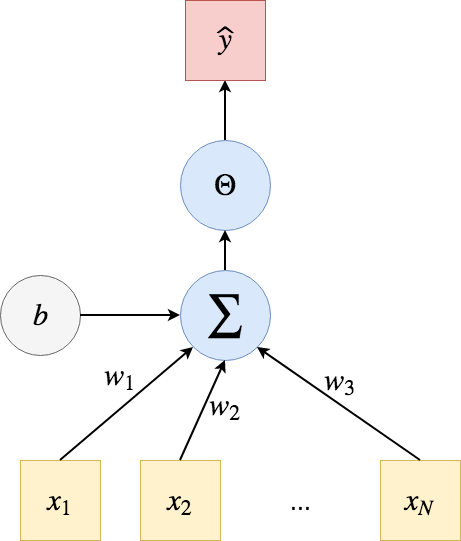

### What do I Need to build Perceptron:
*   Inputs which can be any real values.
*   Weights which will be learned during training
*   Unit Step function as Threshold Function
*  





In [21]:
def unitstep(v):
  """
  Parameters:
  v: input values that has to be squeezed between 0 to 1:
  Returns:
  Either 1 if input values are greater than 0 or 0.
  """
  if v >= 0 :
    return 1
  else:
    return 0
    


In [22]:
def perceptron(x, w, wo):
  """
  Parameters:
  x: array of inputs;
  w: array of weights;
  wo: bias term to be added;
  Returns:
  output y: i.e. 0 or 1
  """
  g = np.dot(w, x) + wo
  y = unitstep(g)
  return y


# Lets implemet Perceptron for AND Gate (We will Hardcode)
w1 = 1, w2 = 1, b = -1.5


In [23]:
def andpercep(x):
  """"
  Parameters:
  x: array of inputs
  Returns:
  output of the perceptron functions.
  """
  w = np.array([1, 1])
  b = -1.5
  return perceptron(x, w, b)

In [24]:
def orpercep(x):
  """
  Parameters
  x: array of inputs
  Returns:
  output of perceptron function
  """
  w = np.array([1, 1])
  b = -0.5
  return perceptron(x, w, b)


In [25]:
def notpercep(x):
  """
  parameters
  x: array of inputs
  Returns:
  output of perceptron function
  """
  w = -1
  b = 0.5
  return perceptron(x, w, b)


In [26]:
print("AND({}, {}) = {}".format(1, 1, andpercep(np.array([1,1]))))
print("OR({}, {}) = {}".format(1, 1, orpercep(np.array([1,1]))))
print("NOT({}) = {}".format(1, notpercep(np.array(1))))

AND(1, 1) = 1
OR(1, 1) = 1
NOT(1) = 0


# Perceptron and Perceptron Learning Algorithm
Frank Rosenblatt proved mathematically that the perceptron learning will converges if the two classes are linarly seperable.

Issues with that:

What happens if classes are not linearly seperable our weights update will never stops.

Thus to make sure it doesnot happen we set a maximum nuber of epochs.

In [27]:
class Rperceptron(object):
  def __init__(self, rate = 0.01, nepochs = 10):
    """parameters
    rate: learning rate
    nepochs: number of iteration we want to implement
    """
    self.rate = rate
    self.nepochs = nepochs
  def learn(self, X, y):
    """
    X: Input array of shape[row, coloumn]
    y: label array of shape[r]
    """
    # weights: create an place holder of an array for weights.
    self.weights = np.zeros(1 + X.shape[1]) # shape of w is [wo, w1, w2,...wn]
    # errors: create an place holder of list  for mistakely classified
    self.errors = []
    for i in range(self.nepochs):
      err = 0
      for xi, yi in zip(X, y):
        delta = self.rate * (yi - self.predict(xi))
        self.weights[1:] += delta * xi
        self.weights[0] += delta
        err += int(delta != 0.0)
      self.errors.append(err)
    return self
  
  def agg_input(self, X):
    """
    Parameters:
    X : array of inputs
    Returns:
    Sum of all the inputs;
    """
    return np.dot(X, self.weights[1:] + self.weights[0]) # H(wo + w1x1 + w2x2...)
  def predict(self, X):
    """
    Returns class label after unit step
    """
    return np.where(self.agg_input(X) >= 0.0, 1, -1)





#Application: classification using the peceptron
Let's try to classify classic iris flower dataset using our own FRperceptron model.

In [31]:
path = "/content/Iris.csv"
import pandas as pd
df = pd.read_csv(path)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
df = df.drop(["Id", "SepalWidthCm", "PetalLengthCm"], axis = 1)

In [34]:
df.head()

,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa


In [35]:
y = df.iloc[0:100, -1].values  # Interesting observation from 0 to 100 there are only two class, so we removed thirdclass Iris-virginica just by slicing.

In [36]:
y = np.where(y == "Iris-setosa", -1, 1) # One Hot encoding for y 

In [37]:
X = df.iloc[0:100,:-1 ].values # creating an 100 input arrays of shape[100, 2]

In [38]:
assert X.shape[0] == y.shape[0], "Shapes are not equal"

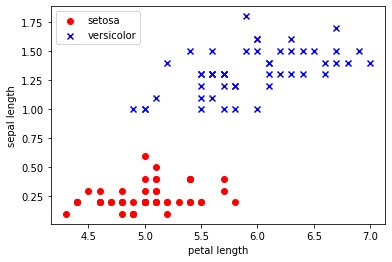

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()


Train our Perceptron Model:


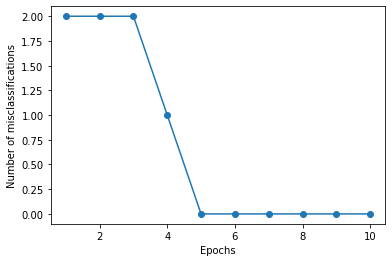

In [41]:
pn = Rperceptron(0.1, 10)
pn.learn(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

# Just for the reference lets visualize the decision boundry

In [42]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())
   

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


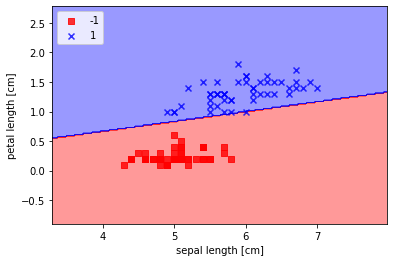

In [43]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#Deep Learning-I: Artficial Neural Network -II

XOR-Affair!!!

"In the book published by Minsky and Papert in 1969, the authors implied that, since a single artificial neuron is incapable of implementing some functions such as the XOR logical function, larger network also have similar limitations,aand therefore should be dropped. Later research on three layered perceptrons showed how to implement such functions, therefore saving the technique from obliteration."
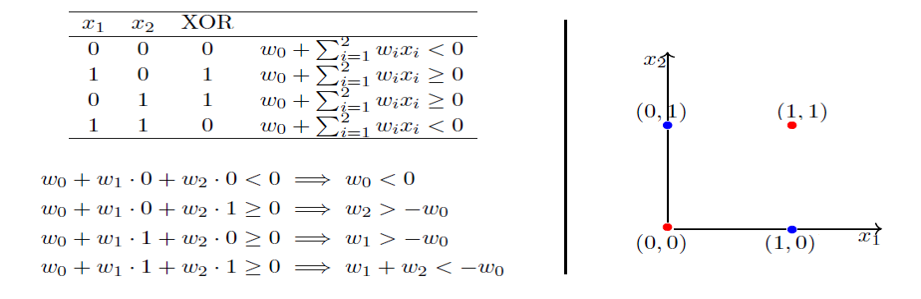



# Solve XOR-Problem:
One approach:
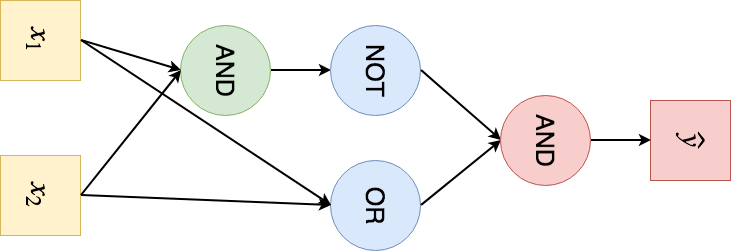


In [44]:
def XORperceptron(x):
  """
  Parameters:
  x: an array of input
  Returns:
  output of perceptron function
  """
  neuron_1 = andpercep(x)
  neuron_2 = notpercep(neuron_1)
  neuron_3 = orpercep(x)
  x_updated = np.array([neuron_2, neuron_3])
  output = andpercep(x_updated)
  return output


In [45]:
print("XOR({}, {}) = {}".format(1, 1, XORperceptron(np.array([1,1]))))
print("XOR({}, {}) = {}".format(0, 0, XORperceptron(np.array([0,0]))))

XOR(1, 1) = 0
XOR(0, 0) = 0


#Perceptron and Non Linear Dataset:

In [46]:
path = "/content/Iris.csv"
import pandas as pd
df2 = pd.read_csv(path)
df2.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df2["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
df2 = df2.drop(["Id", "SepalWidthCm", "PetalLengthCm"], axis = 1)

In [49]:
df2.head()

,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,Iris-setosa
1,4.9,0.2,Iris-setosa
2,4.7,0.2,Iris-setosa
3,4.6,0.2,Iris-setosa
4,5.0,0.2,Iris-setosa


In [50]:
# versicolor and virginica
y2 = df2.iloc[50:150, 2].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df2.iloc[50:150,:-1].values



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


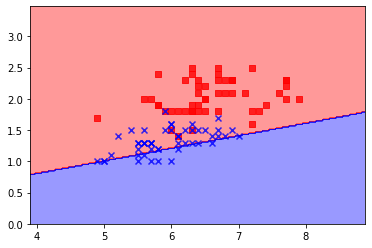

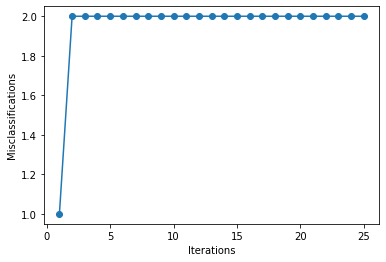

In [51]:
ppn = Rperceptron(rate= 0.01, nepochs=25)
ppn.learn(X2, y2)
import matplotlib.pyplot as plt
plot_decision_regions(X2, y2, classifier=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [53]:
print('Total number of classifications: %d of 100' % (y2 != ppn.predict(X2)).sum())

Total number of classifications: 39 of 100


So we got the accuracy of 39%

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
mlp = MLPClassifier(random_state=1, max_iter=500).fit(X2, y2)
predict = mlp.predict(X2)


In [55]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y2, predict))


              precision    recall  f1-score   support

          -1       0.50      1.00      0.67        50
           1       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy did improve with MLP!!!!!

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


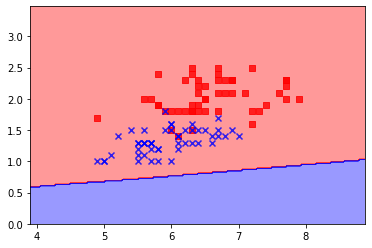

In [ ]:
import matplotlib.pyplot as plt
plot_decision_regions(X2, y2, classifier=mlp)
plt.show()

